### EDA with SQL Notebook for Peer Assignment

In [43]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [45]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [47]:
%sql sqlite:///my_data1.db

In [57]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [69]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [71]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [79]:
%%sql 
PRAGMA table_info(SPACEXTABLE);

 * sqlite:///my_data1.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Date,TEXT,0,None,0
1,Time (UTC),TEXT,0,None,0
2,Booster_Version,TEXT,0,None,0
3,Launch_Site,TEXT,0,None,0
4,Payload,TEXT,0,None,0
5,PAYLOAD_MASS__KG_,INT,0,None,0
6,Orbit,TEXT,0,None,0
7,Customer,TEXT,0,None,0
8,Mission_Outcome,TEXT,0,None,0
9,Landing_Outcome,TEXT,0,None,0


In [81]:
%%sql
SELECT DISTINCT "Launch_Site" 
FROM SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [83]:
%%sql
SELECT * 
FROM SPACEXTABLE 
WHERE "Launch_Site" LIKE 'CCA%' 
LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [85]:
%%sql
SELECT SUM("PAYLOAD_MASS__KG_") 
FROM SPACEXTABLE 
WHERE "Customer" = 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


"SUM(""PAYLOAD_MASS__KG_"")"
45596


In [87]:
%%sql
SELECT AVG("PAYLOAD_MASS__KG_") 
FROM SPACEXTABLE 
WHERE "Booster_Version" LIKE 'F9 v1.1%';

 * sqlite:///my_data1.db
Done.


"AVG(""PAYLOAD_MASS__KG_"")"
2534.6666666666665


In [98]:
%%sql
SELECT MIN("Date") 
FROM SPACEXTABLE 
WHERE "Landing_Outcome" LIKE 'Success (ground pad)'

 * sqlite:///my_data1.db
Done.


"MIN(""Date"")"
2015-12-22


In [106]:
%%sql
SELECT "Booster_Version", "Landing_Outcome", "PAYLOAD_MASS__KG_"
FROM SPACEXTABLE 
WHERE "Landing_Outcome" LIKE 'Success (drone ship)' 
AND "PAYLOAD_MASS__KG_" BETWEEN 4000 AND 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version,Landing_Outcome,PAYLOAD_MASS__KG_
F9 FT B1022,Success (drone ship),4696
F9 FT B1026,Success (drone ship),4600
F9 FT B1021.2,Success (drone ship),5300
F9 FT B1031.2,Success (drone ship),5200


In [114]:
%%sql 
SELECT MISSION_OUTCOME, COUNT(*) as total_number
FROM SPACEXTABLE
GROUP BY MISSION_OUTCOME;

 * sqlite:///my_data1.db
Done.


Mission_Outcome,total_number
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


In [142]:
%%sql
SELECT BOOSTER_VERSION, PAYLOAD_MASS__KG_, Date
FROM SPACEXTABLE
WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTABLE);

 * sqlite:///my_data1.db
Done.


Booster_Version,PAYLOAD_MASS__KG_,Date
F9 B5 B1048.4,15600,2019-11-11
F9 B5 B1049.4,15600,2020-01-07
F9 B5 B1051.3,15600,2020-01-29
F9 B5 B1056.4,15600,2020-02-17
F9 B5 B1048.5,15600,2020-03-18
F9 B5 B1051.4,15600,2020-04-22
F9 B5 B1049.5,15600,2020-06-04
F9 B5 B1060.2,15600,2020-09-03
F9 B5 B1058.3,15600,2020-10-06
F9 B5 B1051.6,15600,2020-10-18


In [132]:
%%sql
SELECT substr(Date,6,2) as month, DATE,BOOSTER_VERSION, LAUNCH_SITE, Landing_Outcome
FROM SPACEXTABLE
where Landing_Outcome = 'Failure (drone ship)' and substr(Date,0,5)='2015';

 * sqlite:///my_data1.db
Done.


month,Date,Booster_Version,Launch_Site,Landing_Outcome
01,2015-01-10,F9 v1.1 B1012,CCAFS LC-40,Failure (drone ship)
04,2015-04-14,F9 v1.1 B1015,CCAFS LC-40,Failure (drone ship)


In [144]:
%%sql
SELECT Landing_Outcome, count(*) as count_outcomes
FROM SPACEXTABLE
WHERE DATE between '2010-06-04' and '2017-03-20' group by Landing_Outcome order by count_outcomes DESC;

 * sqlite:///my_data1.db
Done.


Landing_Outcome,count_outcomes
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


### EDA with Visualisation

In [148]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [154]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


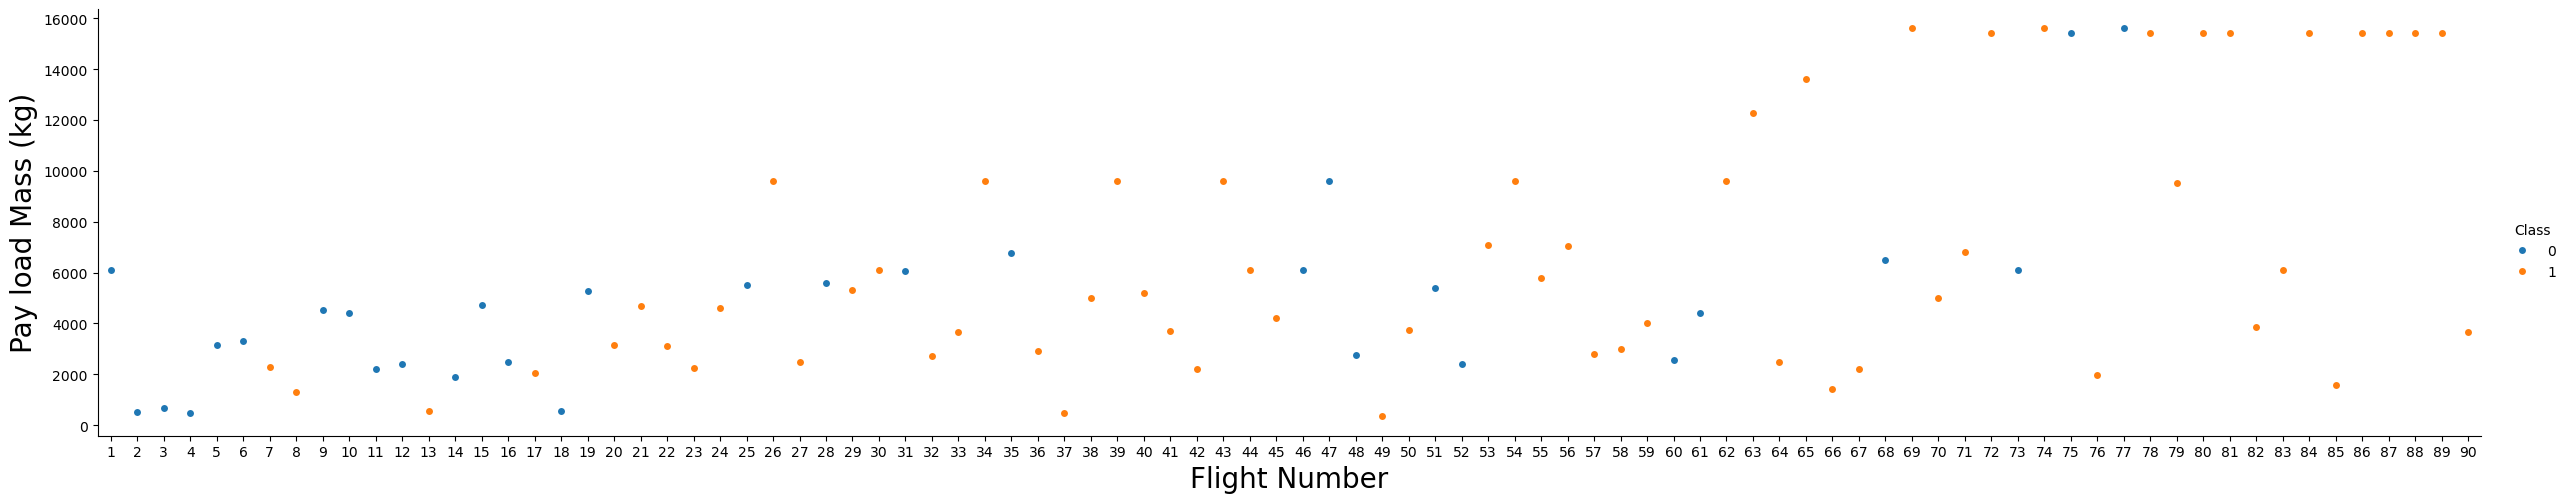

In [156]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

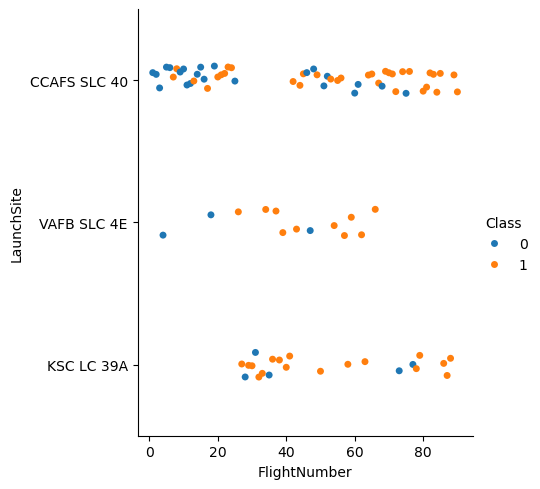

In [160]:
# Create the catplot
sns.catplot(
    data=df,              # Your DataFrame
    x='FlightNumber',     # Set FlightNumber to the x-axis
    y='LaunchSite',      # Set Launch site to the y-axis
    hue='Class',          # Color by 'class' (replace 'class' with the actual column name if different)
    kind='strip'          # Use strip plot to show individual points; you can change to 'box', 'violin', etc.
)

# Display the plot
plt.show()

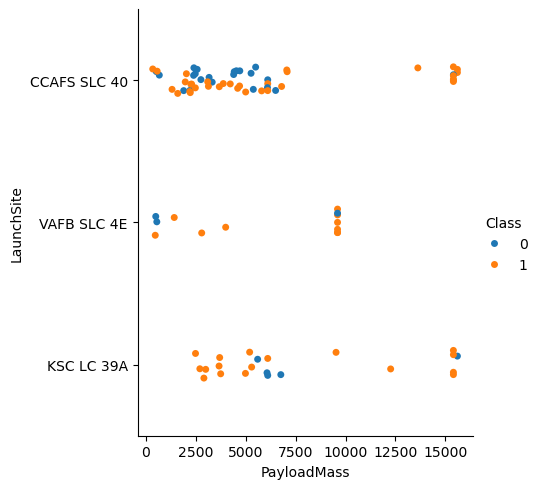

In [162]:
# Create the catplot
sns.catplot(
    data=df,              # Your DataFrame
    x='PayloadMass',     # Set FlightNumber to the x-axis
    y='LaunchSite',      # Set Launch site to the y-axis
    hue='Class',          # Color by 'class' (replace 'class' with the actual column name if different)
    kind='strip'          # Use strip plot to show individual points; you can change to 'box', 'violin', etc.
)

# Display the plot
plt.show()

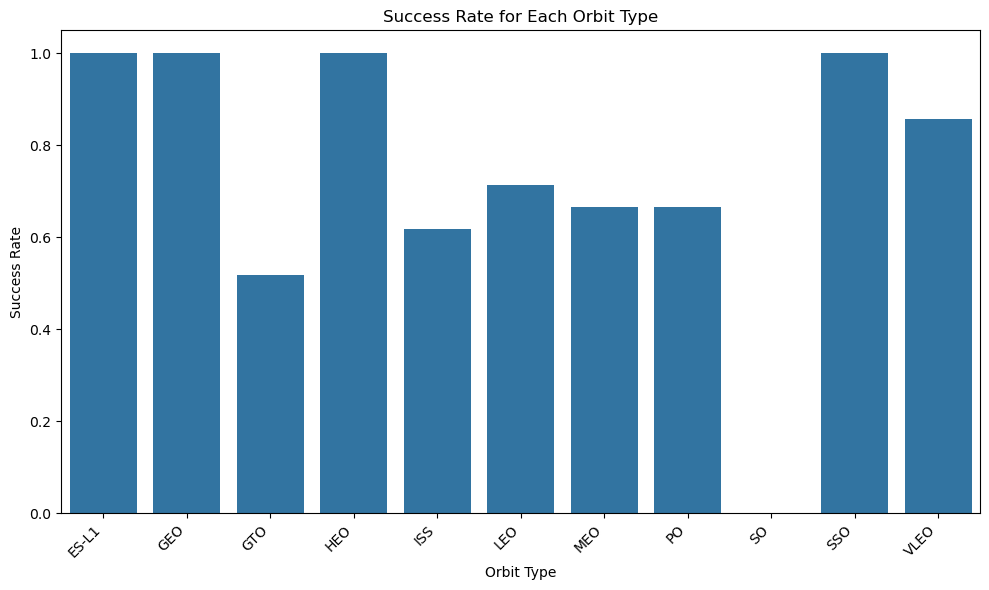

In [164]:
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Plot a bar chart to visualize the success rate of each orbit
plt.figure(figsize=(10, 6))
sns.barplot(data=orbit_success_rate, x='Orbit', y='Class')

# Set labels and title
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate for Each Orbit Type')

# Rotate x-axis labels if necessary for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

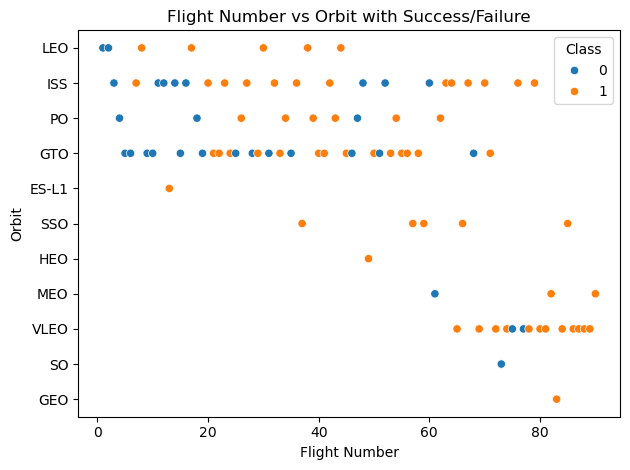

In [168]:
# Create the scatter plot
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class')

# Set labels and title
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Flight Number vs Orbit with Success/Failure')

# Display the plot
plt.tight_layout()
plt.show()

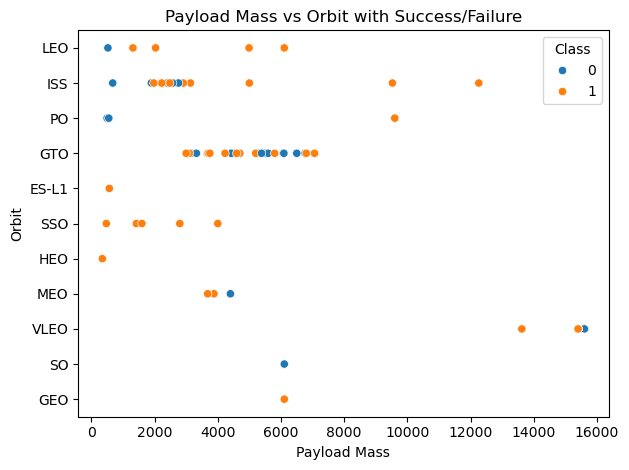

In [170]:
# Create the scatter plot
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class')

# Set labels and title
plt.xlabel('Payload Mass')
plt.ylabel('Orbit')
plt.title('Payload Mass vs Orbit with Success/Failure')

# Display the plot
plt.tight_layout()
plt.show()

In [172]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


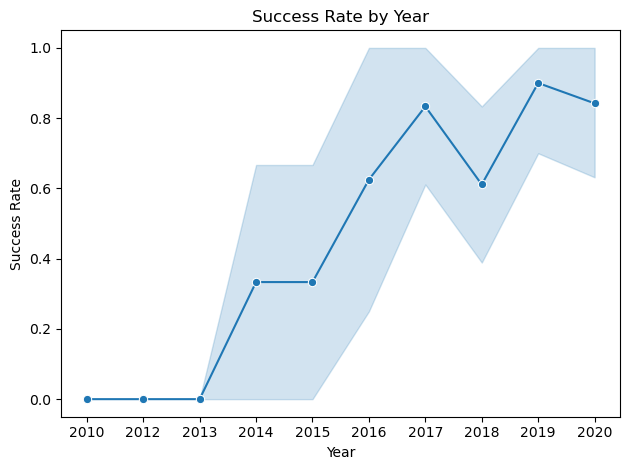

In [174]:
# Plot the line chart

sns.lineplot(data=df, x='Date', y='Class', marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Success Rate by Year')

# Display the plot
plt.tight_layout()
plt.show()

In [176]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [180]:
# Select the columns to be encoded
columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply One-Hot Encoding using get_dummies
features_one_hot = pd.get_dummies(df, columns=columns_to_encode)

# Display the result
print(features_one_hot.head())

   FlightNumber  Date BoosterVersion  PayloadMass      Outcome  Flights  \
0             1  2010       Falcon 9  6104.959412    None None        1   
1             2  2012       Falcon 9   525.000000    None None        1   
2             3  2013       Falcon 9   677.000000    None None        1   
3             4  2013       Falcon 9   500.000000  False Ocean        1   
4             5  2013       Falcon 9  3170.000000    None None        1   

   GridFins  Reused   Legs  Block  ...  Serial_B1048  Serial_B1049  \
0     False   False  False    1.0  ...         False         False   
1     False   False  False    1.0  ...         False         False   
2     False   False  False    1.0  ...         False         False   
3     False   False  False    1.0  ...         False         False   
4     False   False  False    1.0  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0         False         False         False         F

In [182]:
features_one_hot.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Outcome            object
                   ...   
Serial_B1056         bool
Serial_B1058         bool
Serial_B1059         bool
Serial_B1060         bool
Serial_B1062         bool
Length: 86, dtype: object

In [184]:
# Cast the entire features_one_hot dataframe to float64
features_one_hot = features_one_hot.astype('float64')

# Display the dtypes to confirm the change
features_one_hot.dtypes

ValueError: could not convert string to float: 'Falcon 9'